In [2]:
#Install sksurv package
! pip install scikit-survival

  Obtaining dependency information for scikit-survival from https://files.pythonhosted.org/packages/5b/e8/1980b8a6ce4233eeadc448d40dbcaa177e885d3f15300ee7d231bdedee7a/scikit_survival-0.22.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for osqp!=0.6.0,!=0.6.1 from https://files.pythonhosted.org/packages/dd/d1/a091ae0a5fb583147184592011952aeb7827cde73a0fe7b7e95d84d752fd/osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scikit-learn<1.4,>=1.3.0 from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for qdldl from https://files.pythonhosted.org/packages/b3/a7/81b8a67f6155f6

In [3]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import os
#sns.set(rc = {'figure.figsize':(16,9)})
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 1. Load File

In [4]:
#Store Data File Name
train_data_files = ['train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']
test_data_files = ['test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt']
RUL_files = ['RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt']

# Stored Datasets
train_datasets = []
test_datasets = []
RUL_datasets = []

In [5]:
# Define columns name
column1 = ["machine_name", "cycle", "operational_setting_1", "operational_setting_2", "operational_setting_3"]
column2 = [f'sensor_measurement_{i:02}' for i in range(1,22)]
data_column_names = column1 + column2
rul_column_names = ["RUL"]


In [6]:
# Read data
for file_idx in range(len(train_data_files)):
    df_train = pd.read_csv(f"../input/nasa-cmaps/CMaps/{train_data_files[file_idx]}", sep='\s+', header=None, names=data_column_names)
    df_test = pd.read_csv(f"../input/nasa-cmaps/CMaps/{test_data_files[file_idx]}", sep='\s+', header=None, names=data_column_names)
    df_rul = pd.read_csv(f"../input/nasa-cmaps/CMaps/{RUL_files[file_idx]}", sep='\s+', header=None, names=rul_column_names)
    train_datasets.append(df_train)
    test_datasets.append(df_test)
    RUL_datasets.append(df_rul)

In [7]:
train_datasets[1]

,machine_name,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_01,sensor_measurement_02,sensor_measurement_03,sensor_measurement_04,sensor_measurement_05,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


# 2. Check Dataset Missing Values

In [8]:
for idx, (df1, df2, df3) in enumerate(zip(train_datasets, test_datasets, RUL_datasets)):
    if df1.isnull().values.any():
        print(f"{train_data_files[idx]} in train_datasets include null.")
    else:
        print(f"{train_data_files[idx]} in train_datasets no null.")
    if df2.isnull().values.any():
        print(f"{test_data_files[idx]} in test_datasets include null.")
    else:
        print(f"{test_data_files[idx]} in test_datasets no null.")
    if df3.isnull().values.any():
        print(f"{RUL_files[idx]} in RUL_datasets include null.")
    else:
        print(f"{RUL_files[idx]} in RUL_datasets no null.")

train_FD001.txt in train_datasets no null.
test_FD001.txt in test_datasets no null.
RUL_FD001.txt in RUL_datasets no null.
train_FD002.txt in train_datasets no null.
test_FD002.txt in test_datasets no null.
RUL_FD002.txt in RUL_datasets no null.
train_FD003.txt in train_datasets no null.
test_FD003.txt in test_datasets no null.
RUL_FD003.txt in RUL_datasets no null.
train_FD004.txt in train_datasets no null.
test_FD004.txt in test_datasets no null.
RUL_FD004.txt in RUL_datasets no null.


# 3. Feature Selection
* Variance
* Random Forest


Features selected by variance method: ['sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_07', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_14', 'sensor_measurement_17', 'sensor_measurement_20']
Features selected by Random Forest: ['operational_setting_1', 'operational_setting_2', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_20', 'sensor_measurement_21']
Final selected features: ['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measurement_07', 'sensor_measurement_20', 'sensor_measurement_02', 'sensor_measurement_04', 'sensor_measurement_14', 'sensor_measurement_11', 'sensor_measurement_09']


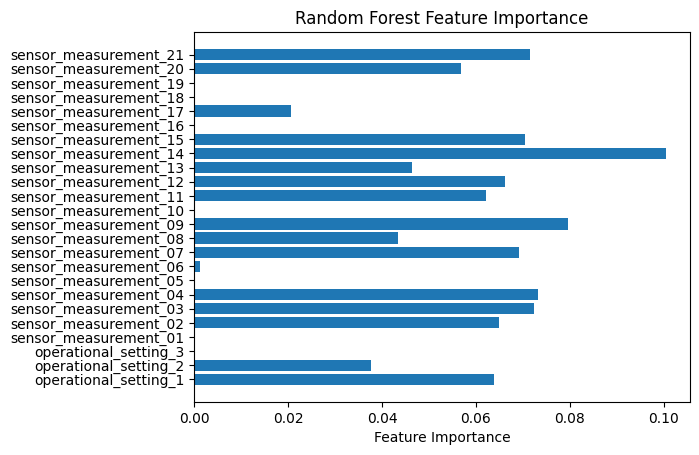


Features selected by variance method: ['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_01', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_05', 'sensor_measurement_06', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']
Features selected by Random Forest: ['operational_setting_1', 'operational_setting_2', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_20', 'sensor_measurement_21'

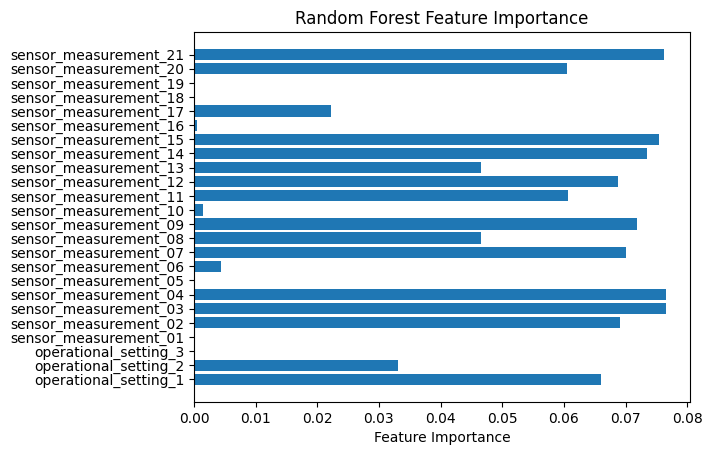


Features selected by variance method: ['sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_17', 'sensor_measurement_20', 'sensor_measurement_21']
Features selected by Random Forest: ['operational_setting_1', 'operational_setting_2', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_06', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_20', 'sensor_measurement_21']
Final selected features: ['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measurement_07', 'sensor_measurement_20', 'sensor_measurement_02', 'sensor_measurement_13', 'sensor_measurement_04

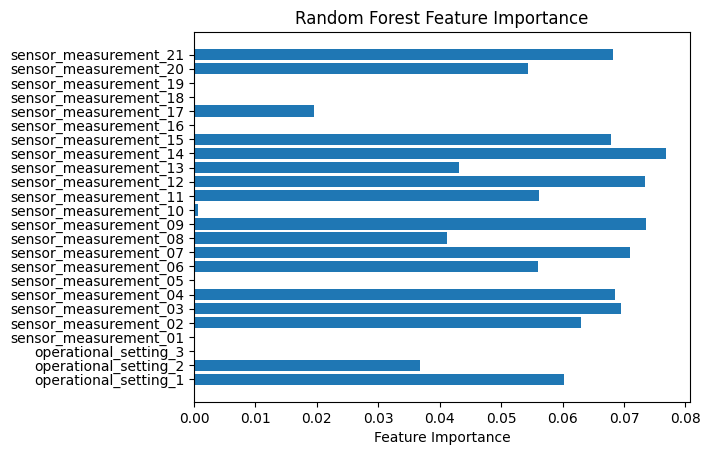


Features selected by variance method: ['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_01', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_05', 'sensor_measurement_06', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']
Features selected by Random Forest: ['operational_setting_1', 'operational_setting_2', 'sensor_measurement_02', 'sensor_measurement_03', 'sensor_measurement_04', 'sensor_measurement_07', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_20', 'sensor_measurement_21'

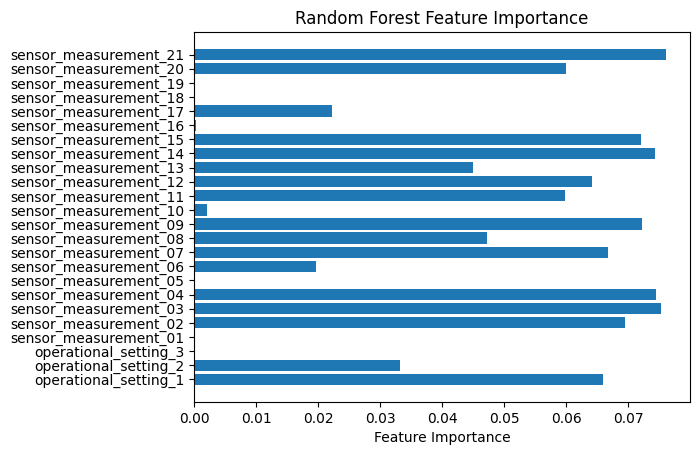

In [9]:
selected_feature_dataset = []
for file_idx in range(len(train_data_files)):
    # Calculate the variances to find the important features
    data_array = train_datasets[file_idx].iloc[:, 2:].values
    variances = np.var(data_array, axis=0)
    variance_threshold = 0.02
    variance_selected_columns = train_datasets[file_idx].iloc[:, 2:].columns[variances > variance_threshold]

    # Use Random Forest to find the important features
    model = RandomForestRegressor(random_state=50)
    model.fit(train_datasets[file_idx].iloc[:, 2:], train_datasets[file_idx].iloc[:, :1].squeeze())
    #model.fit(train_datasets[file_idx].iloc[:, 2:], train_datasets[file_idx].iloc[:, 2:]) #unsupervised training for feature selection
    feature_importances = model.feature_importances_
    print()
    rf_selected_columns = train_datasets[file_idx].iloc[:, 2:].columns[feature_importances > 0.025]

    # Get the same features from two methods
    common_selected_columns = set(variance_selected_columns) & set(rf_selected_columns)
    final_selected_features = list(common_selected_columns)
    selected_feature_dataset.append(final_selected_features)

    print("Features selected by variance method:", list(variance_selected_columns))
    print("Features selected by Random Forest:", list(rf_selected_columns))
    print("Final selected features:", final_selected_features)
    plt.barh(train_datasets[file_idx].iloc[:, 2:].columns, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

In [10]:
#selected features
for i, features in enumerate(selected_feature_dataset):
    print(f"FD00{i+1}: ")
    print(selected_feature_dataset[i])

FD001: 
['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measurement_07', 'sensor_measurement_20', 'sensor_measurement_02', 'sensor_measurement_04', 'sensor_measurement_14', 'sensor_measurement_11', 'sensor_measurement_09']
FD002: 
['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measurement_07', 'sensor_measurement_20', 'sensor_measurement_02', 'sensor_measurement_13', 'operational_setting_2', 'sensor_measurement_04', 'sensor_measurement_14', 'operational_setting_1', 'sensor_measurement_11', 'sensor_measurement_21', 'sensor_measurement_08', 'sensor_measurement_09', 'sensor_measurement_15']
FD003: 
['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measurement_07', 'sensor_measurement_20', 'sensor_measurement_02', 'sensor_measurement_13', 'sensor_measurement_04', 'sensor_measurement_14', 'sensor_measurement_11', 'sensor_measurement_21', 'sensor_measurement_08', 'sensor_measurement_09']
FD004: 
['sensor_measurement_03', 'sensor_measurement_12', 'sensor_measur

# 4. Normalize Dataset

In [11]:
#Create New Datasets with Selected Features
new_train_datasets = []
new_test_datasets = []
for i in range(len(train_datasets)):
    new_feature = selected_feature_dataset[i]
    new_train = pd.merge(train_datasets[i].iloc[:,:2], train_datasets[i][new_feature], left_index=True, right_index=True)
    new_test = pd.merge(test_datasets[i].iloc[:,:2], test_datasets[i][new_feature], left_index=True, right_index=True)
    new_train_datasets.append(new_train)
    new_test_datasets.append(new_test)

In [12]:
#Explore uniqueness
for i in range(len(new_train_datasets)):
    print(f"FD00{i+1}")
    print(new_train_datasets[i].nunique())

FD001
machine_name              100
cycle                     362
sensor_measurement_03    3012
sensor_measurement_12     427
sensor_measurement_07     513
sensor_measurement_20     120
sensor_measurement_02     310
sensor_measurement_04    4051
sensor_measurement_14    6078
sensor_measurement_11     159
sensor_measurement_09    6403
dtype: int64
FD002
machine_name               260
cycle                      378
sensor_measurement_03    12305
sensor_measurement_12     1672
sensor_measurement_07     2067
sensor_measurement_20      510
sensor_measurement_02     1590
sensor_measurement_13      514
operational_setting_2      105
sensor_measurement_04    15411
sensor_measurement_14    14905
operational_setting_1      536
sensor_measurement_11      681
sensor_measurement_21    17837
sensor_measurement_08      897
sensor_measurement_09    22434
sensor_measurement_15     8464
dtype: int64
FD003
machine_name              100
cycle                     525
sensor_measurement_03    3358
sensor_me

In [13]:
#Min_Max Scale
scaler = MinMaxScaler(feature_range=(0, 1))
for file_idx in range(len(new_train_datasets)):
    new_train_datasets[file_idx].iloc[:,2:] = scaler.fit_transform(new_train_datasets[file_idx].iloc[:,2:])
    new_test_datasets[file_idx].iloc[:,2:] = scaler.transform(new_test_datasets[file_idx].iloc[:,2:])

# 5. COX Survival Analysis

## Data Preprocessing For COX

* Select Max Cycle of training data as lifespan of the machine

* Calculate RUL for the training dataset for the machine at each cycle

* RUL will be the actual failure time for the machine at current state (each cycle)

* Treat each machine at each cycle independently 

### Reasoning
* Time-to-event data, also known as survival data, consists of information on the time it takes for an event of interest to occur. -- Time series data is not applicable to survival analysis

* Time Variable: This is the primary variable of interest and represents the time until the occurrence of the event. It could be measured in days, months, years, etc., depending on the context of the study.

* Event Indicator: A binary variable indicating whether the event of interest has occurred or not. Often, it is coded as 1 for the occurrence of the event and 0 for no event.

* Censoring: In survival analysis, censoring occurs when the event of interest has not occurred by the end of the study period or is not observed for some other reason. Censored observations are an essential aspect of survival analysis, and statistical methods like Cox proportional-hazards regression can handle them.

* By modifying the datasets and treating each cycle independently, we could obtain more datapoints for survival analysis

* We could predict the survival curve for machines in the testing datasets with the starting time point at current cycle  -- in other words, we are actually predicting the Remaining Survival Curve for the machine instead of a single RUL value

### Modify Training dataset

In [14]:
#modify original datasets by adding RUL column. RUL column will be the actual failure time for the machine at current state
for i in range(len(new_train_datasets)):
    data_train = new_train_datasets[i]
    data_train['RUL'] = data_train.groupby('machine_name')['cycle'].transform(max) - data_train['cycle']

new_train_datasets[1].head()

,machine_name,cycle,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15,RUL
0,1,1,0.311201,0.136817,0.138036,0.156036,0.181576,0.992394,0.997625,0.273095,0.476508,0.833134,0.471498,0.159082,0.650057,0.289692,0.369947,148
1,1,2,0.296600,0.003297,0.004081,0.007888,0.131847,0.992229,0.998575,0.245535,0.533013,0.999767,0.486156,0.014562,0.626663,0.258841,0.381407,147
2,1,3,0.035297,0.089030,0.092860,0.133745,0.016332,0.001157,0.738480,0.056997,0.039296,0.595096,0.037459,0.151414,0.000718,0.012893,0.936731,146
3,1,4,0.298795,0.004058,0.003962,0.014060,0.128269,0.992091,0.999525,0.246979,0.524349,0.999993,0.466612,0.026144,0.626684,0.258841,0.372400,145
4,1,5,0.037871,0.089258,0.091284,0.135460,0.014130,0.001075,0.736698,0.058152,0.030633,0.595137,0.053746,0.143240,0.000697,0.006235,0.937537,144


### Modify Testing Dataset

In [15]:
for i in range(len(new_test_datasets)):
    data_test = new_test_datasets[i]
    data_test_max_observed = data_test.groupby(['machine_name']).agg({'cycle':'max'})
    #data_test_max_observed = data_test.groupby('machine_name')['cycle'].transform('max')
    data_test_RUL = RUL_datasets[i]
    data_test_RUL = data_test_RUL.set_index(data_test_max_observed.index)

    data_test_max_observed['life'] = data_test_RUL['RUL']  +  data_test_max_observed['cycle']
    data_test_max_observed.drop(['cycle'],axis=1,inplace=True)
    data_test=data_test.merge(data_test_max_observed,how='left',on=['machine_name'])
    #print(data_test)

    data_test['RUL']=data_test['life'] - data_test['cycle']
    data_test.drop(['life'],axis=1,inplace=True)
    new_test_datasets[i] = data_test
    
new_test_datasets[1].head()

,machine_name,cycle,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15,RUL
0,1,1,0.686550,0.615269,0.615102,0.625514,0.637673,0.993662,0.297150,0.676888,0.632503,0.238019,0.763844,0.633951,0.853406,0.632664,0.114199,275
1,1,2,0.643289,0.472289,0.471481,0.483882,0.663272,0.993496,0.831354,0.535166,0.487219,0.476162,0.653909,0.500205,0.863942,0.591537,0.331283,274
2,1,3,0.312475,0.136766,0.135435,0.164609,0.187815,0.992477,0.997625,0.251745,0.487171,0.833282,0.453583,0.165078,0.650099,0.288302,0.370350,273
3,1,4,0.287038,0.003247,0.004630,0.005830,0.134324,0.992394,0.998812,0.250614,0.520160,0.999967,0.486971,0.023186,0.626684,0.266881,0.388254,272
4,1,5,0.025599,0.089892,0.092955,0.141632,0.010918,0.001213,0.737886,0.064796,0.041177,0.595089,0.043160,0.145822,0.000697,0.009406,0.927248,271


### Create Event Indicators

In [16]:
for i in range(len(new_train_datasets)):
    cox_df = new_train_datasets[i]
    cox_df['status'] = True
new_train_datasets[1].head()

,machine_name,cycle,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15,RUL,status
0,1,1,0.311201,0.136817,0.138036,0.156036,0.181576,0.992394,0.997625,0.273095,0.476508,0.833134,0.471498,0.159082,0.650057,0.289692,0.369947,148,True
1,1,2,0.296600,0.003297,0.004081,0.007888,0.131847,0.992229,0.998575,0.245535,0.533013,0.999767,0.486156,0.014562,0.626663,0.258841,0.381407,147,True
2,1,3,0.035297,0.089030,0.092860,0.133745,0.016332,0.001157,0.738480,0.056997,0.039296,0.595096,0.037459,0.151414,0.000718,0.012893,0.936731,146,True
3,1,4,0.298795,0.004058,0.003962,0.014060,0.128269,0.992091,0.999525,0.246979,0.524349,0.999993,0.466612,0.026144,0.626684,0.258841,0.372400,145,True
4,1,5,0.037871,0.089258,0.091284,0.135460,0.014130,0.001075,0.736698,0.058152,0.030633,0.595137,0.053746,0.143240,0.000697,0.006235,0.937537,144,True


In [17]:
#Get the max_cycle data of testing set
cox_test_datasets = []
for i in range(len(new_test_datasets)):
    max_cycle = new_test_datasets[i].groupby(by = "machine_name")['cycle'].transform(max)
    cox_df = new_test_datasets[i][new_test_datasets[i]["cycle"] == max_cycle].set_index('machine_name')
    cox_test_datasets.append(cox_df)
cox_test_datasets[1].head()

,cycle,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15,RUL
machine_name,,,,,,,,,,,,,,,,,
1,258,0.734850,0.613190,0.612811,0.621399,0.641251,0.994047,0.297031,0.725220,0.758557,0.238231,0.786645,0.630441,0.853722,0.683627,0.150081,18
2,55,0.942544,0.994242,0.994129,0.982167,0.983026,0.993496,0.000000,0.949309,0.689675,0.000043,0.912052,0.986132,0.999535,0.870344,0.032623,79
3,165,0.343736,0.136944,0.137893,0.156722,0.186531,0.993359,0.999050,0.269147,0.530466,0.833210,0.462541,0.167717,0.650712,0.298976,0.356510,106
4,86,0.661547,0.471173,0.471553,0.481481,0.664832,0.993496,0.831354,0.562557,0.509425,0.476176,0.671824,0.493236,0.864195,0.607747,0.329233,110
5,148,0.312122,0.004312,0.003866,0.005487,0.140196,0.996087,0.997625,0.280581,0.696387,0.999940,0.504886,0.019887,0.629471,0.330063,0.388364,15


### Split Data to X and y

In [18]:
#Data Preparation for Model
cox_train_X=[]
cox_test_X=[]
cox_train_y=[]
cox_test_y=[]
for i in range(len(new_train_datasets)):
    #Prepare X
    train_X = new_train_datasets[i].iloc[:, 2:-2]
    cox_train_X.append(train_X)
    #test_X = new_test_datasets[i].iloc[:, 2:-1]
    test_X = cox_test_datasets[i].iloc[:, 1:-1]
    cox_test_X.append(test_X)
    test_y = cox_test_datasets[i].iloc[:, -1]
    cox_test_y.append(test_y)

    #Prepare y
    train_y_df = list(new_train_datasets[i].loc[:, ["status", "RUL"]].itertuples(index = None, name = None))
    train_y_df = np.array(train_y_df, dtype=[('status', bool), ('RUL', float)])
    cox_train_y.append( train_y_df)

In [19]:
cox_train_X[1].head()

,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15
0,0.311201,0.136817,0.138036,0.156036,0.181576,0.992394,0.997625,0.273095,0.476508,0.833134,0.471498,0.159082,0.650057,0.289692,0.369947
1,0.296600,0.003297,0.004081,0.007888,0.131847,0.992229,0.998575,0.245535,0.533013,0.999767,0.486156,0.014562,0.626663,0.258841,0.381407
2,0.035297,0.089030,0.092860,0.133745,0.016332,0.001157,0.738480,0.056997,0.039296,0.595096,0.037459,0.151414,0.000718,0.012893,0.936731
3,0.298795,0.004058,0.003962,0.014060,0.128269,0.992091,0.999525,0.246979,0.524349,0.999993,0.466612,0.026144,0.626684,0.258841,0.372400
4,0.037871,0.089258,0.091284,0.135460,0.014130,0.001075,0.736698,0.058152,0.030633,0.595137,0.053746,0.143240,0.000697,0.006235,0.937537


In [20]:
print(cox_train_y[1][:5])

[( True, 148.) ( True, 147.) ( True, 146.) ( True, 145.) ( True, 144.)]


In [21]:
cox_test_X[1].head()

,sensor_measurement_03,sensor_measurement_12,sensor_measurement_07,sensor_measurement_20,sensor_measurement_02,sensor_measurement_13,operational_setting_2,sensor_measurement_04,sensor_measurement_14,operational_setting_1,sensor_measurement_11,sensor_measurement_21,sensor_measurement_08,sensor_measurement_09,sensor_measurement_15
machine_name,,,,,,,,,,,,,,,
1,0.734850,0.613190,0.612811,0.621399,0.641251,0.994047,0.297031,0.725220,0.758557,0.238231,0.786645,0.630441,0.853722,0.683627,0.150081
2,0.942544,0.994242,0.994129,0.982167,0.983026,0.993496,0.000000,0.949309,0.689675,0.000043,0.912052,0.986132,0.999535,0.870344,0.032623
3,0.343736,0.136944,0.137893,0.156722,0.186531,0.993359,0.999050,0.269147,0.530466,0.833210,0.462541,0.167717,0.650712,0.298976,0.356510
4,0.661547,0.471173,0.471553,0.481481,0.664832,0.993496,0.831354,0.562557,0.509425,0.476176,0.671824,0.493236,0.864195,0.607747,0.329233
5,0.312122,0.004312,0.003866,0.005487,0.140196,0.996087,0.997625,0.280581,0.696387,0.999940,0.504886,0.019887,0.629471,0.330063,0.388364


In [22]:
cox_test_y[1].head()

machine_name
1     18
2     79
3    106
4    110
5     15
Name: RUL, dtype: int64

### COX Proportional Hazard Model Training

In [23]:
#Training Models
from sksurv.linear_model import CoxPHSurvivalAnalysis
cox_estimators = []
for i in range(len(cox_train_X)):
    train_X = cox_train_X[i]
    train_y = cox_train_y[i]
    cox_estimator = CoxPHSurvivalAnalysis(ties = "efron") #Efron’s method is more accurate if there are a large number of ties (different objects have same event time).
    cox_estimator.fit(train_X, train_y)
    cox_estimators.append(cox_estimator)

### Survival Functions Prediction

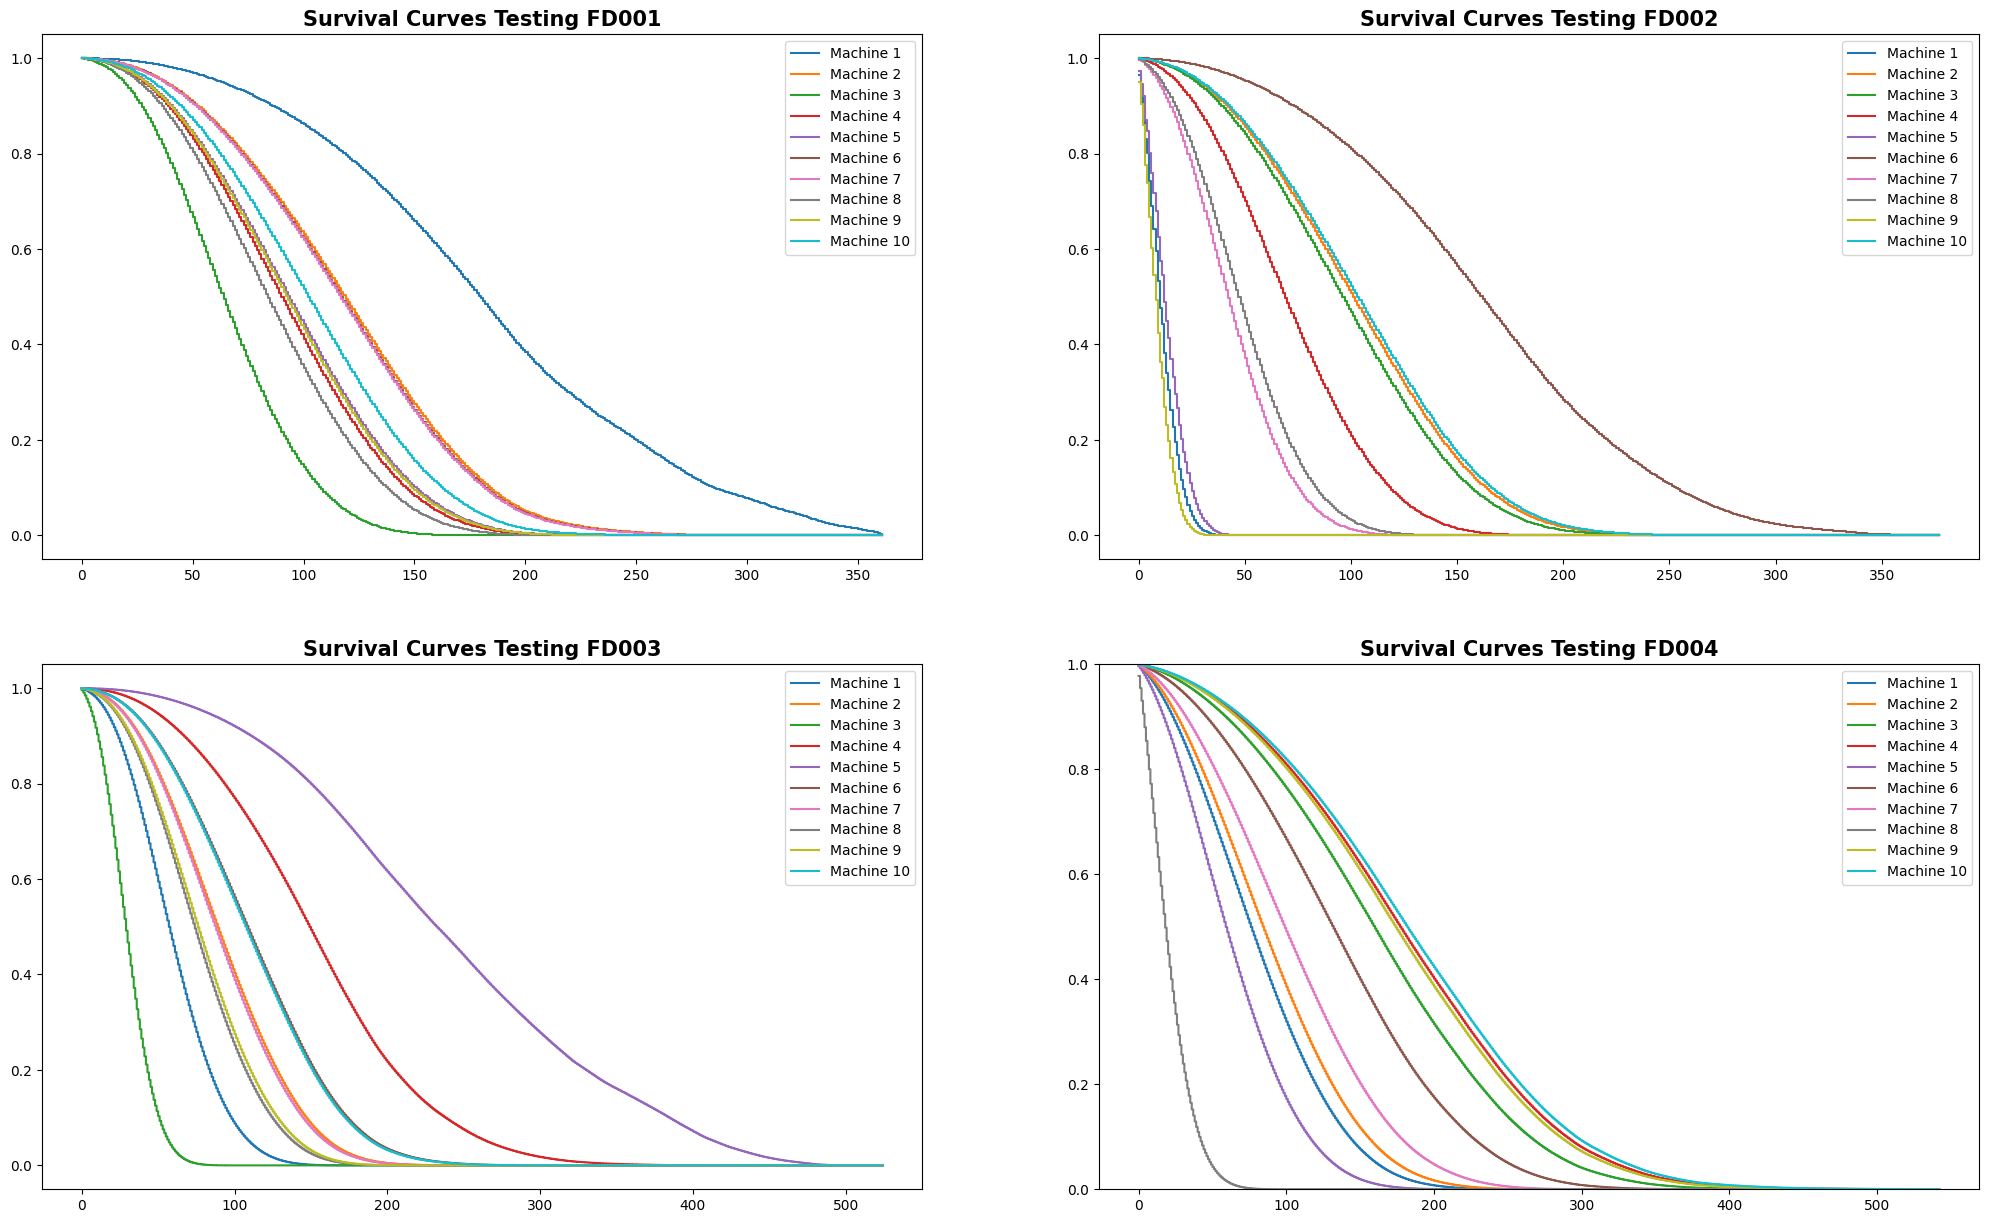

In [34]:
#Predict Survival Functions
plt.figure(figsize=(25, 15))
survival_function_sets = []
for i in range(len(cox_estimators)):
    test_X = cox_test_X[i]
    estimator = cox_estimators[i]
    test_survival_funcs = estimator.predict_survival_function(test_X) #predict survival function
    survival_function_sets.append(test_survival_funcs)
    plt.subplot(2,2,i+1)
    for j, fn in enumerate(test_survival_funcs[:10]):
        #print(fn.y)
        plt.step(fn.x, fn(fn.x), where="post",label=f'Machine {j + 1}')

    plt.title(f"Survival Curves Testing FD00{i+1}",fontweight='bold', fontsize = '15')
    plt.legend()

plt.ylim(0, 1)
plt.show()

### Coefficients of CoxPH

In [25]:
#Coef
cox_coefs=[]
for i in range(len(cox_estimators)):
    train_X = cox_train_X[i]
    estimator = cox_estimators[i]
    coef = pd.Series(estimator.coef_, index = train_X.columns)
    print(f"FD00{i+1}")
    print(coef)
    cox_coefs.append(coef)

FD001
sensor_measurement_03    0.856861
sensor_measurement_12   -2.090083
sensor_measurement_07   -1.728780
sensor_measurement_20   -1.088054
sensor_measurement_02    0.916743
sensor_measurement_04    1.980175
sensor_measurement_14    2.874124
sensor_measurement_11    2.440038
sensor_measurement_09    4.346868
dtype: float64
FD002
sensor_measurement_03      9.493296
sensor_measurement_12     19.125472
sensor_measurement_07      7.345917
sensor_measurement_20    -13.742354
sensor_measurement_02     40.172130
sensor_measurement_13    115.086003
operational_setting_2     12.848741
sensor_measurement_04     17.842381
sensor_measurement_14      4.736889
operational_setting_1    -15.001882
sensor_measurement_11     28.920687
sensor_measurement_21    -10.486670
sensor_measurement_08   -205.524955
sensor_measurement_09     25.033617
sensor_measurement_15     26.970993
dtype: float64
FD003
sensor_measurement_03    1.313589
sensor_measurement_12    1.079859
sensor_measurement_07    0.706856
sens

**Interpretation:**

- e.g FD001 Every one unit increase in `sensor_measurement_09` will increase the hazard rate by $e^{4.346868}$ assuming there are no changes in other covariates

### Model Evaluation

* Training c-index

In [26]:
#training c-index
c_indices = []
for i in range(len(cox_estimators)):
    estimator = cox_estimators[i]
    train_X = cox_train_X[i]
    train_y = cox_train_y[i]
    #Calculate concordance index on the testing set
    c_index = estimator.score(train_X, train_y)
    c_indices.append(c_index)
    print(f"Concordance index for FD00{i+1}: {c_index}")

Concordance index for FD001: 0.8093334652497188
Concordance index for FD002: 0.803472310772997
Concordance index for FD003: 0.8266679365924433
Concordance index for FD004: 0.7940526518143466


* Survival Function Expectation 
* Survival Function 95% CI

In [27]:
from scipy.integrate import quad
from sklearn.metrics import mean_squared_error

In [28]:
def calculate_t0(S_t):
    lower_bound = S_t.x.min()
    upper_bound = S_t.x.max()
    target_probability = 0.05
    #initial_guess = lower_bound+upper_bound//2
    tolerance = 1e-5

    while upper_bound - lower_bound > tolerance:
        mid_point = (lower_bound + upper_bound) / 2
        probability_at_mid_point = S_t(mid_point)

        if probability_at_mid_point > target_probability:
            lower_bound = mid_point
        else:
            upper_bound = mid_point

    result = (lower_bound + upper_bound) / 2
    return result

In [29]:
expectations_sets = []
MSEs=[]
ratio_sets = []
for i in range(len(survival_function_sets)):
    test_Y = cox_test_y[i]
    count = 0
    expectations = []
    for k in range(len(survival_function_sets[i])):
        S_t = survival_function_sets[i][k]
        def survival_function(t):
            return S_t(t)
        #Calculate Expectation
        expectation, error = quad(survival_function, 0, S_t.x.max())
        expectations.append(expectation)
    
        # Calculate the 95% confidence interval
        #S(t) refer to the probability that a machine could survive until t0
        #We directly use S(tx) = 0.05, indicating that 95% machine will not survival until tx. 
        #We will be 95% confident that our machine failure will happen before tx
        t0 = calculate_t0(S_t)
        confidence_interval = (0, t0)
        
        RUL_true = test_Y.iloc[k]
        if confidence_interval[0]<=RUL_true<=confidence_interval[1]:
            count += 1


    expectations_sets.append(expectations)
    ratio = count/len(test_Y)
    mse = mean_squared_error(test_Y, expectations)
    MSEs.append(mse)
    ratio_sets.append(ratio)
    print(f"FD00{i+1} Ratio: {ratio}")
    print(f"FD00{i+1} MSE: {mse}")

/tmp/ipykernel_42/524617474.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  expectation, error = quad(survival_function, 0, S_t.x.max())


FD001 Ratio: 0.99
FD001 MSE: 1346.0769445973635


/tmp/ipykernel_42/524617474.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  expectation, error = quad(survival_function, 0, S_t.x.max())


FD002 Ratio: 0.972972972972973
FD002 MSE: 1223.9073529838388


/tmp/ipykernel_42/524617474.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  expectation, error = quad(survival_function, 0, S_t.x.max())


FD003 Ratio: 1.0
FD003 MSE: 3348.635747746246


/tmp/ipykernel_42/524617474.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  expectation, error = quad(survival_function, 0, S_t.x.max())


FD004 Ratio: 0.9919354838709677
FD004 MSE: 2467.3865836455784


In [30]:
import math

In [31]:
for i in range(len(RUL_datasets)):
    RUL = RUL_datasets[i]
    print(f"FD00{i+1} RUL Mean")
    RUL_description = RUL.mean()
    print(RUL_description)
    mse = MSEs[i]
    mse_sqrt = math.sqrt(mse)
    print(f"FD00{i+1} RMSE")
    print(mse_sqrt)
    print()
    


FD001 RUL Mean
RUL    75.52
dtype: float64
FD001 RMSE
36.68892127873704

FD002 RUL Mean
RUL    81.185328
dtype: float64
FD002 RMSE
34.984387274666375

FD003 RUL Mean
RUL    75.32
dtype: float64
FD003 RMSE
57.8673979693769

FD004 RUL Mean
RUL    86.552419
dtype: float64
FD004 RMSE
49.67279520668812

